In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.api.types import is_integer_dtype
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

Load and explore the dataset
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data

In [2]:
# Load data
# Dataset is "IBM HR Analytics Employee Attrition & Performance" from kaggle
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Start exploring data by listing all columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]


Age                 0
Attrition           0
BusinessTravel      0
DailyRate           0
Department          0
DistanceFromHome    0
Education           0
EducationField      0
EmployeeCount       0
EmployeeNumber      0
dtype: int64

In [5]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


Since this dataset appears to have been previously cleaned, there are no missing values

In [6]:
# Find the number of columns of type integer
int_columns = df.dtypes=="int64"
sum(int_columns)

26

In [7]:
# Show descriptive statistics of integer type columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Replace categorical data of Attrition, OverTime and Gender with numerical values

In [8]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [9]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,0.600000,65.891156,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,0.490065,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,0.000000,48.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,1.000000,66.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,1.000000,83.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'HourlyRate'}>],
       [<Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

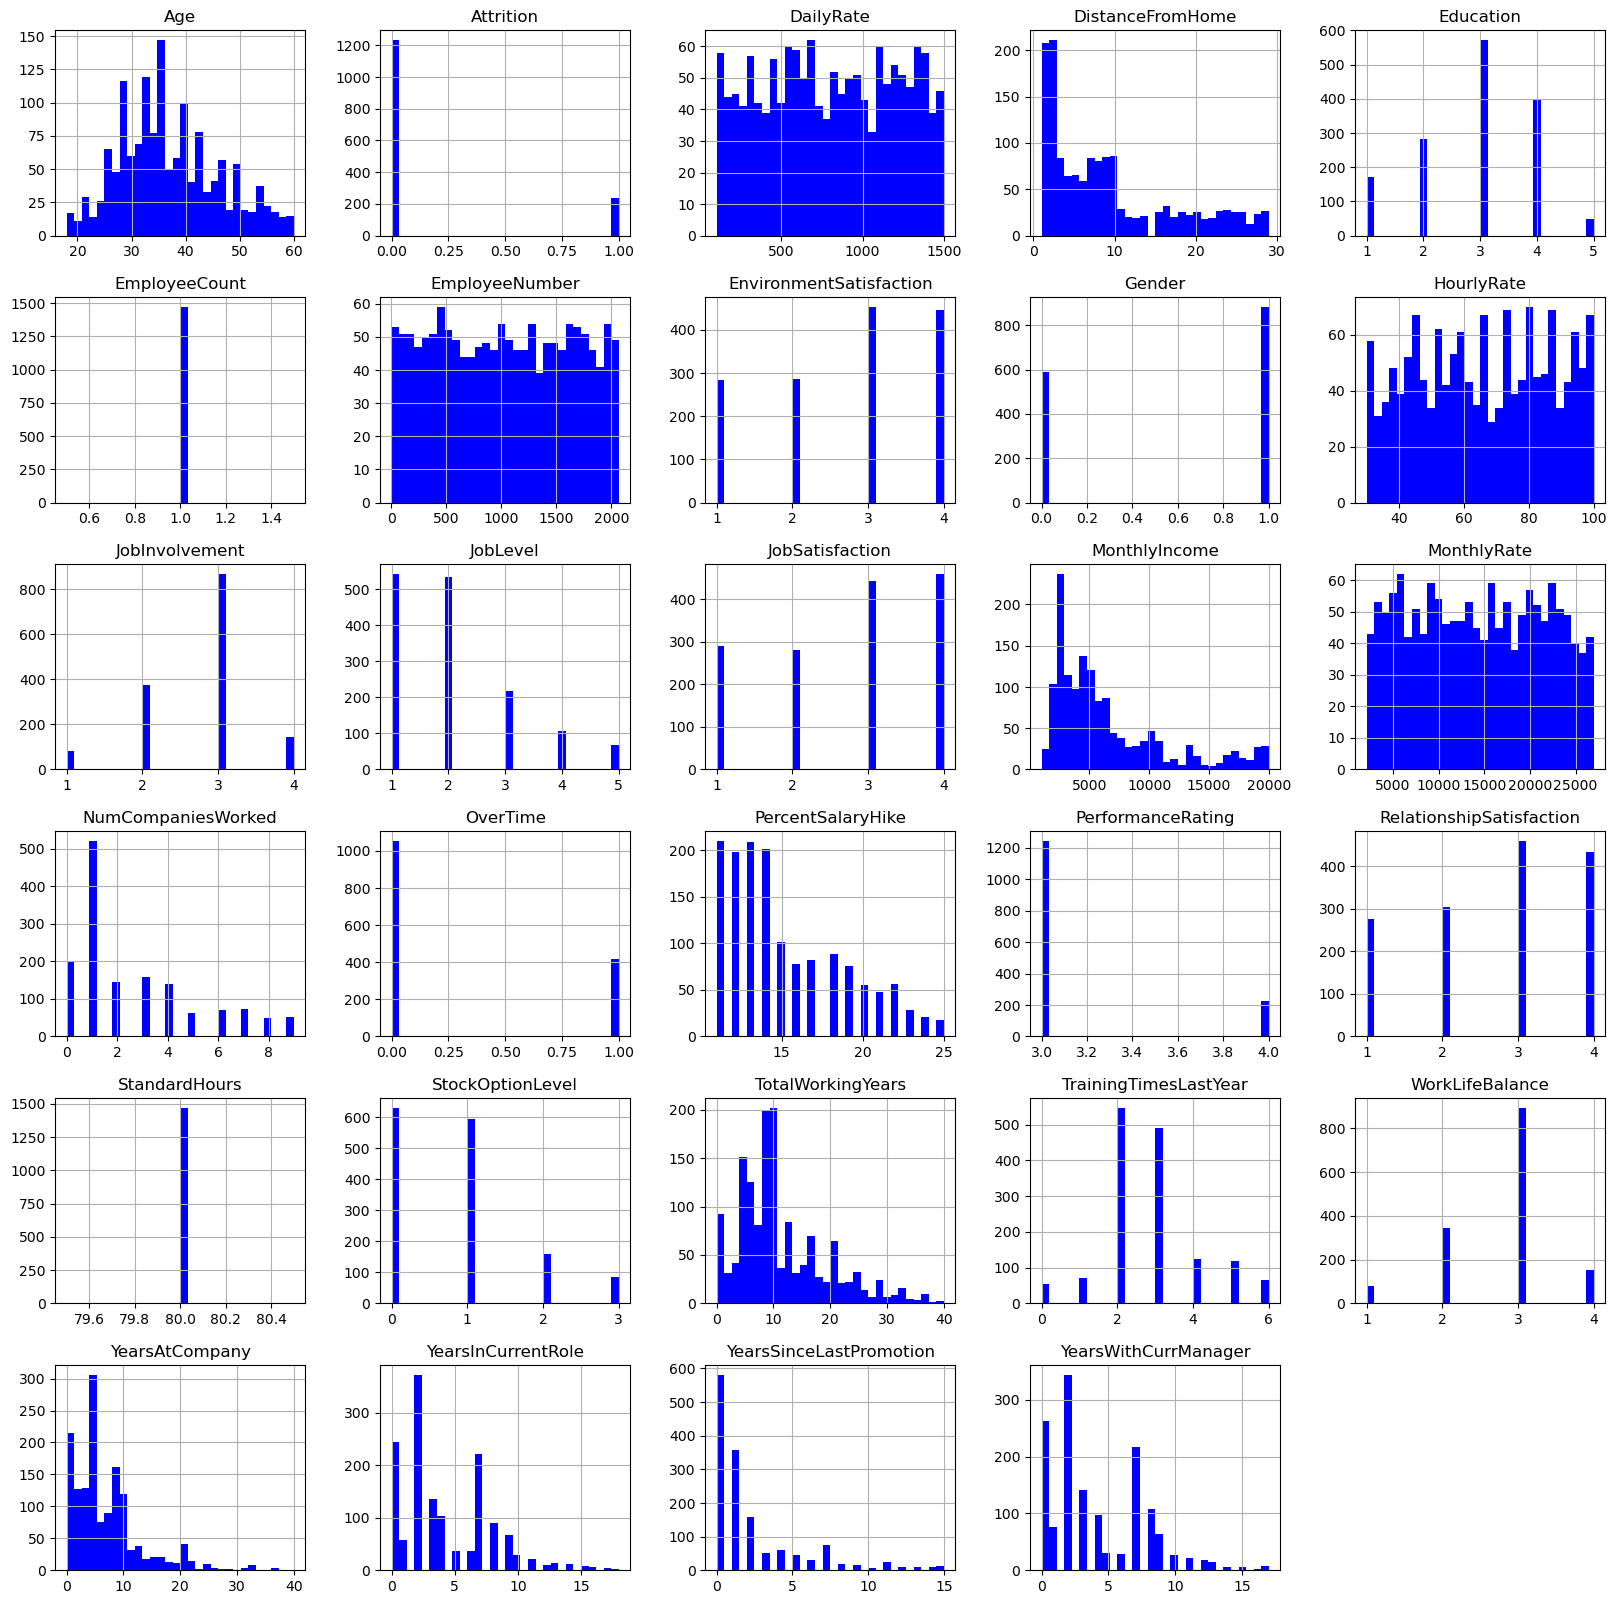

In [10]:
# Display histogram for each numerical feature
df.hist(bins = 30,figsize = (20, 20), color = 'b')

Building a Model

I am interested in seeing if there is a relationship between the years worked at the company (YearsAtCompany), job level (JobLevel), education level (Education, whether they work overtime (OverTime) and the employee's monthly income (MonthlyIncome)

Prediction target: MonthlyIncome

Features: [YearsAtCompany, JobLevel,Education,OverTime]

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

In [11]:
y = df.MonthlyIncome
employee_features = ['YearsAtCompany','JobLevel','Education','OverTime']
X = df[employee_features]

Review data

In [12]:
X.describe()

,YearsAtCompany,JobLevel,Education,OverTime
count,1470.000000,1470.000000,1470.000000,1470.000000
mean,7.008163,2.063946,2.912925,0.282993
std,6.126525,1.106940,1.024165,0.450606
min,0.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,2.000000,0.000000
50%,5.000000,2.000000,3.000000,0.000000
75%,9.000000,3.000000,4.000000,1.000000
max,40.000000,5.000000,5.000000,1.000000


In [13]:
X.head()

,YearsAtCompany,JobLevel,Education,OverTime
0,6,2,2,1
1,10,2,1,0
2,0,1,2,1
3,8,1,4,1
4,2,1,1,0


Specify and Fit Model

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
HR_model = DecisionTreeRegressor(random_state=1)

# Fit model
HR_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [15]:
print("Making predictions for the first 5 employees:")
print(X.head())
print("The predictions are")
predictions = HR_model.predict(X)
print("First in-sample predictions: ", predictions[:5])
print("Actual target values for those employees:", y[:5].tolist())

Making predictions for the first 5 employees:
   YearsAtCompany  JobLevel  Education  OverTime
0               6         2          2         1
1              10         2          1         0
2               0         1          2         1
3               8         1          4         1
4               2         1          1         0
The predictions are
First in-sample predictions:  [6402.         5720.5        1829.5        2651.5        2931.45454545]
Actual target values for those employees: [5993, 5130, 2090, 2909, 3468]


Split dataset into training and test sets

In [16]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [17]:
# Specify the model
HR_model = DecisionTreeRegressor(random_state=1)

# Fit model with the training data.
HR_model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [18]:
# Predict with all validation observations
val_predictions = HR_model.predict(val_X)

In [19]:
# print the top few validation predictions
print("Top validation predictions:")
print(val_predictions[:5])
# print the top few actual prices from validation data
print("Indexes of top validation items:")
print(val_X.head().index.tolist())
print("Top actual target values from validation data:")
print(df.MonthlyIncome[1291],df.MonthlyIncome[1153],df.MonthlyIncome[720],df.MonthlyIncome[763],df.MonthlyIncome[976])

Top validation predictions:
[ 4838.75  2090.    2717.    3277.   13225.  ]
Indexes of top validation items:
[1291, 1153, 720, 763, 976]
Top actual target values from validation data:
4213 1569 2132 2220 13402


Calculate the Mean Absolute Error in Validation Data

In [20]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y,val_predictions)

print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 1,116


In [21]:
# Define function to calculate MAE
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [22]:
candidate_max_leaf_nodes = [2, 3, 4, 5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
for max_leaf_nodes in candidate_max_leaf_nodes:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  2025
Max leaf nodes: 3  		 Mean Absolute Error:  1470
Max leaf nodes: 4  		 Mean Absolute Error:  1001
Max leaf nodes: 5  		 Mean Absolute Error:  938
Max leaf nodes: 25  		 Mean Absolute Error:  960
Max leaf nodes: 50  		 Mean Absolute Error:  979
Max leaf nodes: 100  		 Mean Absolute Error:  1048
Max leaf nodes: 250  		 Mean Absolute Error:  1102
Max leaf nodes: 500  		 Mean Absolute Error:  1091


In [23]:
final_model = DecisionTreeRegressor(max_leaf_nodes=5,random_state=1)
final_model.fit(train_X,train_y)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=1)

In [24]:
val_predictions = final_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 939


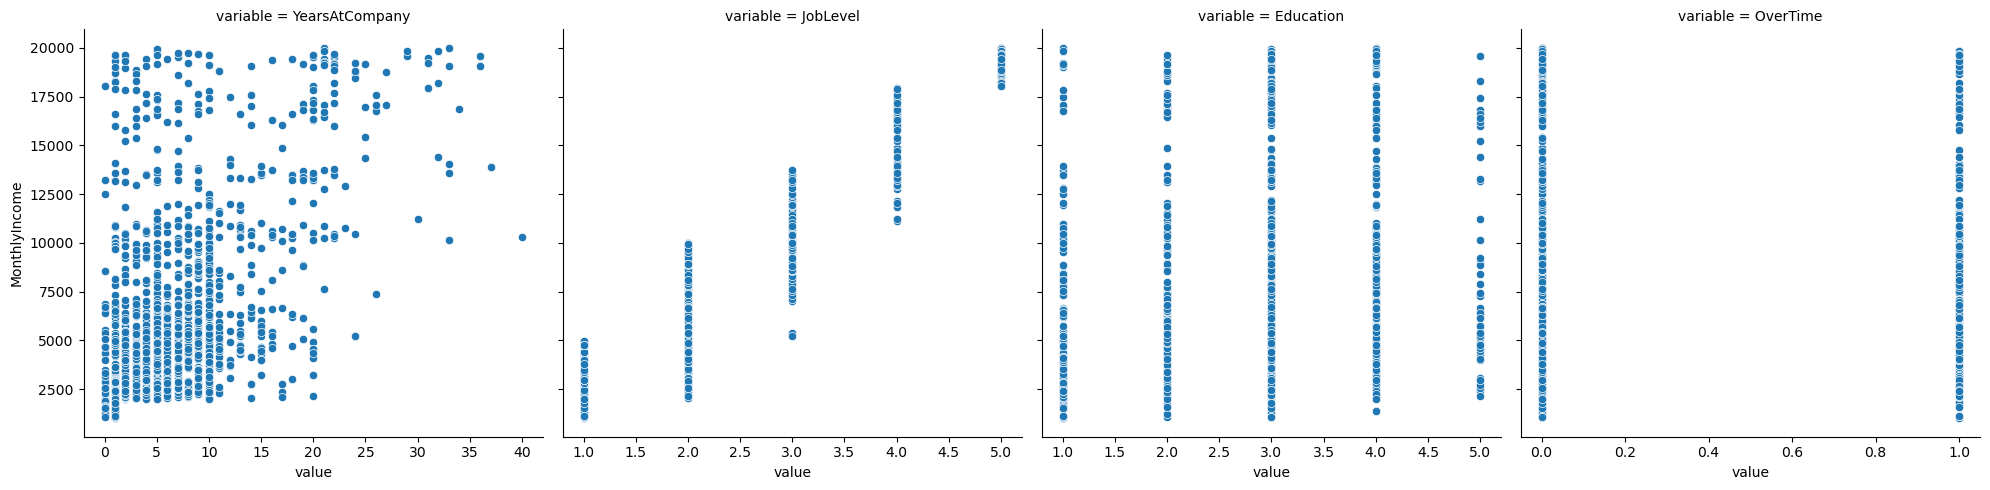

In [25]:
sns.relplot(
    x="value", y="MonthlyIncome", col="variable", data=df.melt(id_vars="MonthlyIncome", value_vars=employee_features), facet_kws=dict(sharex=False),
);